In [1]:
import pandas as pd
import statsmodels.formula.api as stm
import seaborn as sb
import matplotlib.pyplot as mpl
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot

## Question - 1

In [2]:
profit = pd.read_csv('50_Startups.csv')
profit.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
profit.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


### EDA and Data Visualization

In [4]:
profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


### Feature Engineering

In [5]:
# Renaming Columns
profit.rename({'R&D Spend':'RD','Administration':'Admin', 'Marketing Spend':'MS'}, axis=1, inplace = True)
profit.head()

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
profit.drop(('State'), axis=1, inplace = True)
profit.tail()

,RD,Admin,MS,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [7]:
profit.describe()

,RD,Admin,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
profit.corr()

,RD,Admin,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


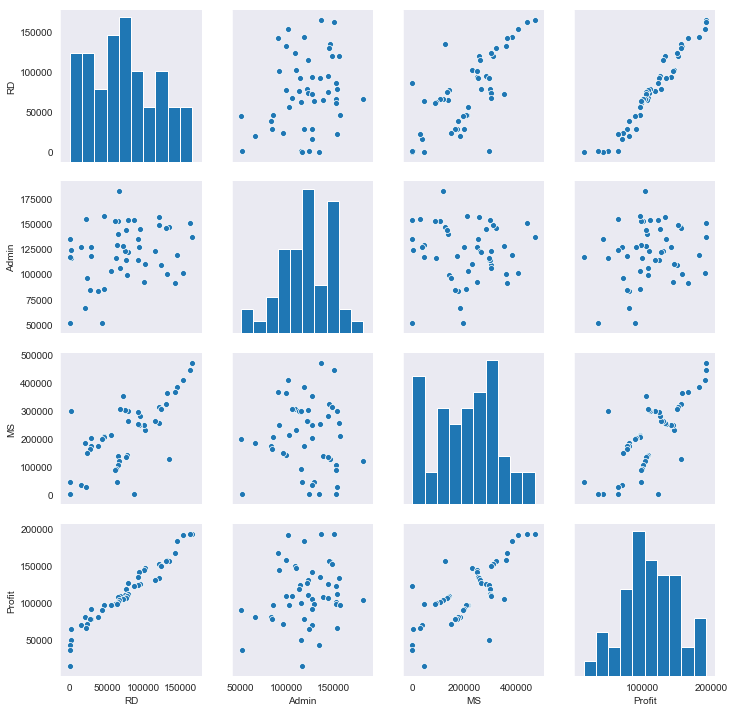

In [9]:
sb.set_style(style='dark')
sb.pairplot(profit)

### Model Building

In [10]:
profit1 = stm.ols('Profit~RD+Admin+MS',data=profit).fit()

### Model Testing

In [11]:
# Finding Coefficient parameters, tvalues, pvalues, rsquared values
profit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           4.53e-30
Time:                        19:24:09   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Getting Coefficient parameters in Details
profit1.params

Intercept    50122.192990
RD               0.805715
Admin           -0.026816
MS               0.027228
dtype: float64

In [13]:
# Build SLR and MLR models for insignificant variables 'Admin' and 'MS'
# Also find their tvalues and pvalues
slr_Admin=stm.ols('Profit~Admin', data=profit).fit()

In [14]:
slr_Admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 17 Aug 2022   Prob (F-statistic):              0.162
Time:                        19:24:09   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
slr_ms=stm.ols('Profit~MS', data=profit).fit()

In [16]:
slr_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           4.38e-10
Time:                        19:24:09   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
mlr_AD=stm.ols("Profit~Admin+MS",data=profit).fit()
mlr_AD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           2.50e-10
Time:                        19:24:09   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Admin          0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Validation

In [18]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=stm.ols("RD~Admin+MS",data=profit).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=stm.ols("Admin~RD+MS",data=profit).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=stm.ols("MS~RD+Admin",data=profit).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RD','Admin','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RD,2.468903
1,Admin,1.175091
2,MS,2.326773


In [19]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


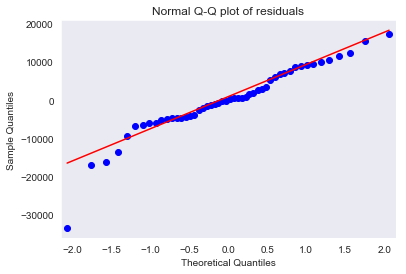

In [20]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(profit1.resid,line='q')
mpl.title("Normal Q-Q plot of residuals")
mpl.show()

In [21]:
list(np.where(profit1.resid<-30000))

[array([49], dtype=int64)]

In [22]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

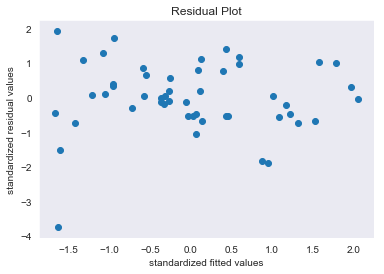

In [23]:
mpl.scatter(standard_values(profit1.fittedvalues),standard_values(profit1.resid))
mpl.title('Residual Plot')
mpl.xlabel('standardized fitted values')
mpl.ylabel('standardized residual values')
mpl.show() 

In [24]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

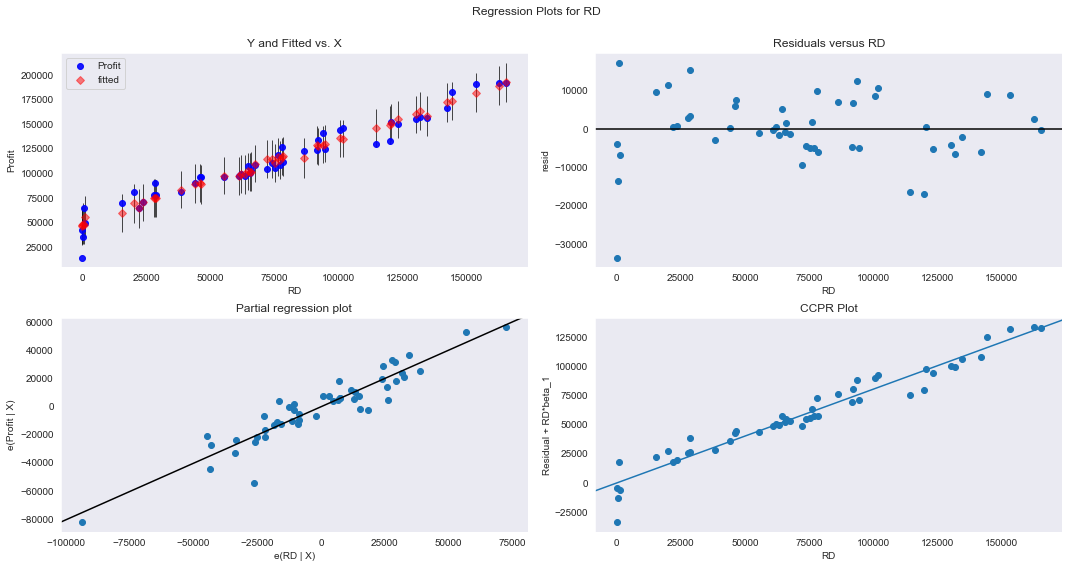

In [25]:
fig=mpl.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(profit1,'RD',fig=fig)
mpl.show()

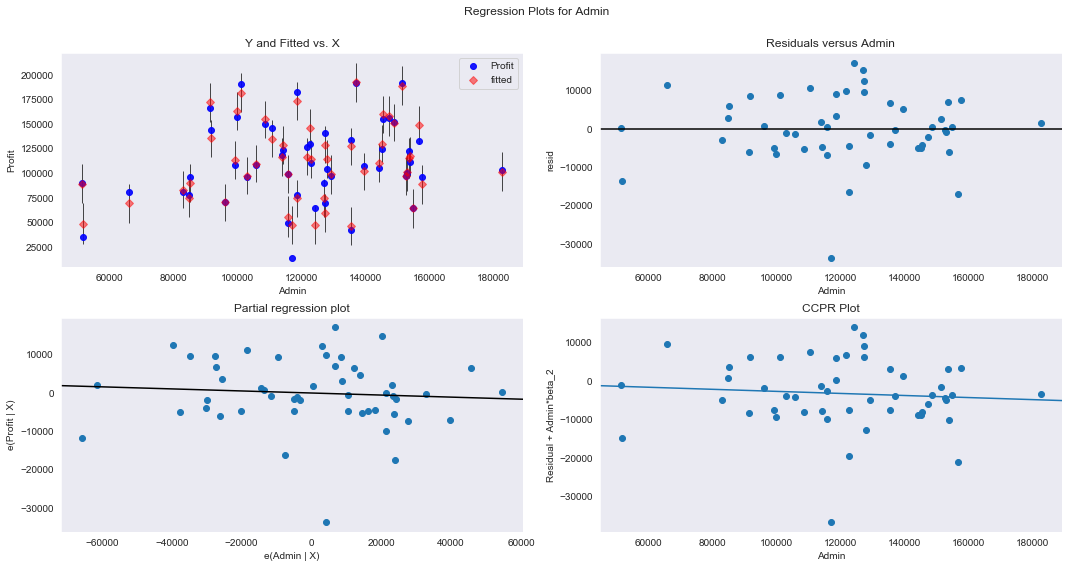

In [26]:
fig=mpl.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(profit1,'Admin',fig=fig)
mpl.show()

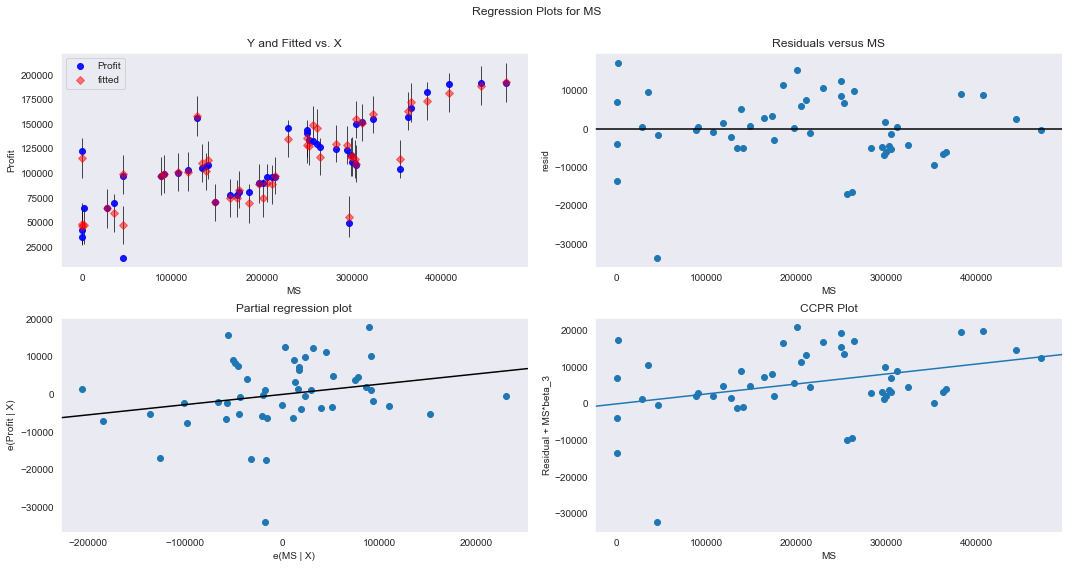

In [27]:
fig=mpl.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(profit1,'MS',fig=fig)
mpl.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)

### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [28]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=profit1.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

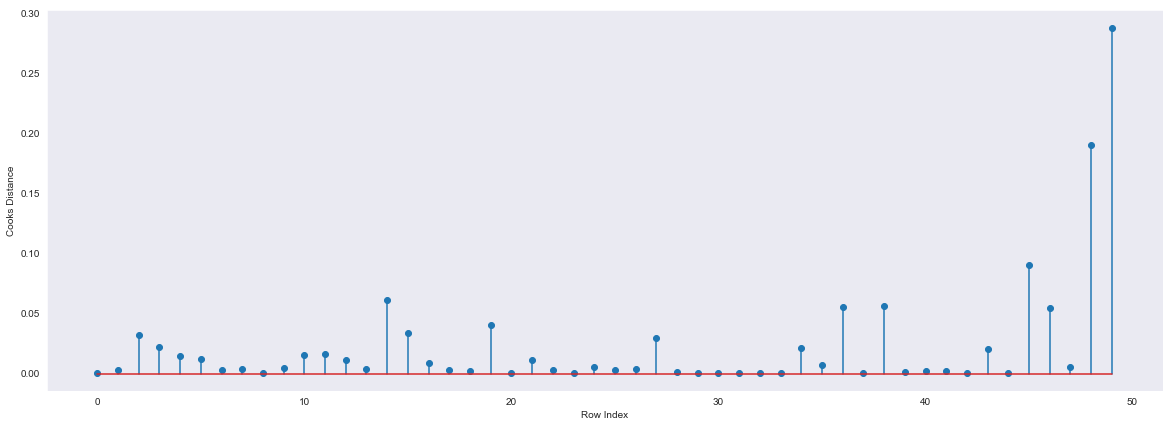

In [29]:
# Plot the influencers using the stem plot
fig=mpl.figure(figsize=(20,7))
mpl.stem(np.arange(len(profit)),np.round(c,5))
mpl.xlabel('Row Index')
mpl.ylabel('Cooks Distance')
mpl.show()

In [30]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432584)

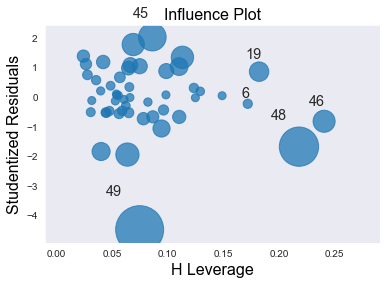

In [31]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(profit1)
mpl.show()

In [32]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=profit.shape[1]
n=profit.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [33]:
profit[profit.index.isin([49])] 

,RD,Admin,MS,Profit
49,0.0,116983.8,45173.06,14681.4


## Improving the Model

In [34]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
profit2=profit.drop(profit.index[[49]],axis=0).reset_index(drop=True)
profit2

,RD,Admin,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


### Model Deletion Diagnostics and Final Model

In [35]:
while np.max(c)>0.5 :
    model=stm.ols("Profit~RD+Admin+MS",data=profit2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    profit2=frofit2.drop(profit2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    profit2
else:
    final_model=stm.ols("Profit~RD+Admin+MS",data=profit2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [36]:
final_model.rsquared

0.9613162435129847

In [37]:
profit2

,RD,Admin,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


### Model Predictions

In [38]:
# say New data for prediction is
new_data=pd.DataFrame({'RD':65858,"Admin":87585,"MS":158785},index=[0])
new_data

,RD,Admin,MS
0,65858,87585,158785


In [39]:
# Manual Prediction of Price
final_model.predict(new_data)

0    106011.590942
dtype: float64

In [40]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(profit2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

### table containing R^2 value for each prepared model

In [41]:
d2={'Prep_Models':['profit1','Final_Model'],'Rsquared':[profit1.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,profit1,0.950746
1,Final_Model,0.961316


## Question - 2

In [42]:
price = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
price.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [43]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
Id                  1436 non-null int64
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1436 non-null int64
Met_Color           1436 non-null int64
Color               1436 non-null object
Automatic           1436 non-null int64
cc                  1436 non-null int64
Doors               1436 non-null int64
Cylinders           1436 non-null int64
Gears               1436 non-null int64
Quarterly_Tax       1436 non-null int64
Weight              1436 non-null int64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1  

In [44]:
price2=pd.concat([price.iloc[:,2:4],price.iloc[:,6:7],price.iloc[:,8:9],price.iloc[:,12:14],price.iloc[:,15:18]],axis=1)
price2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [45]:
price3=price2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
price3.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [46]:
price3[price3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [47]:
price4=price3.drop_duplicates().reset_index(drop=True)
price4.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [48]:
price4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
Price     1435 non-null int64
Age       1435 non-null int64
KM        1435 non-null int64
HP        1435 non-null int64
CC        1435 non-null int64
Doors     1435 non-null int64
Gears     1435 non-null int64
QT        1435 non-null int64
Weight    1435 non-null int64
dtypes: int64(9)
memory usage: 101.0 KB


In [49]:
price4.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


### Correlation Analysis

In [50]:
price4.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


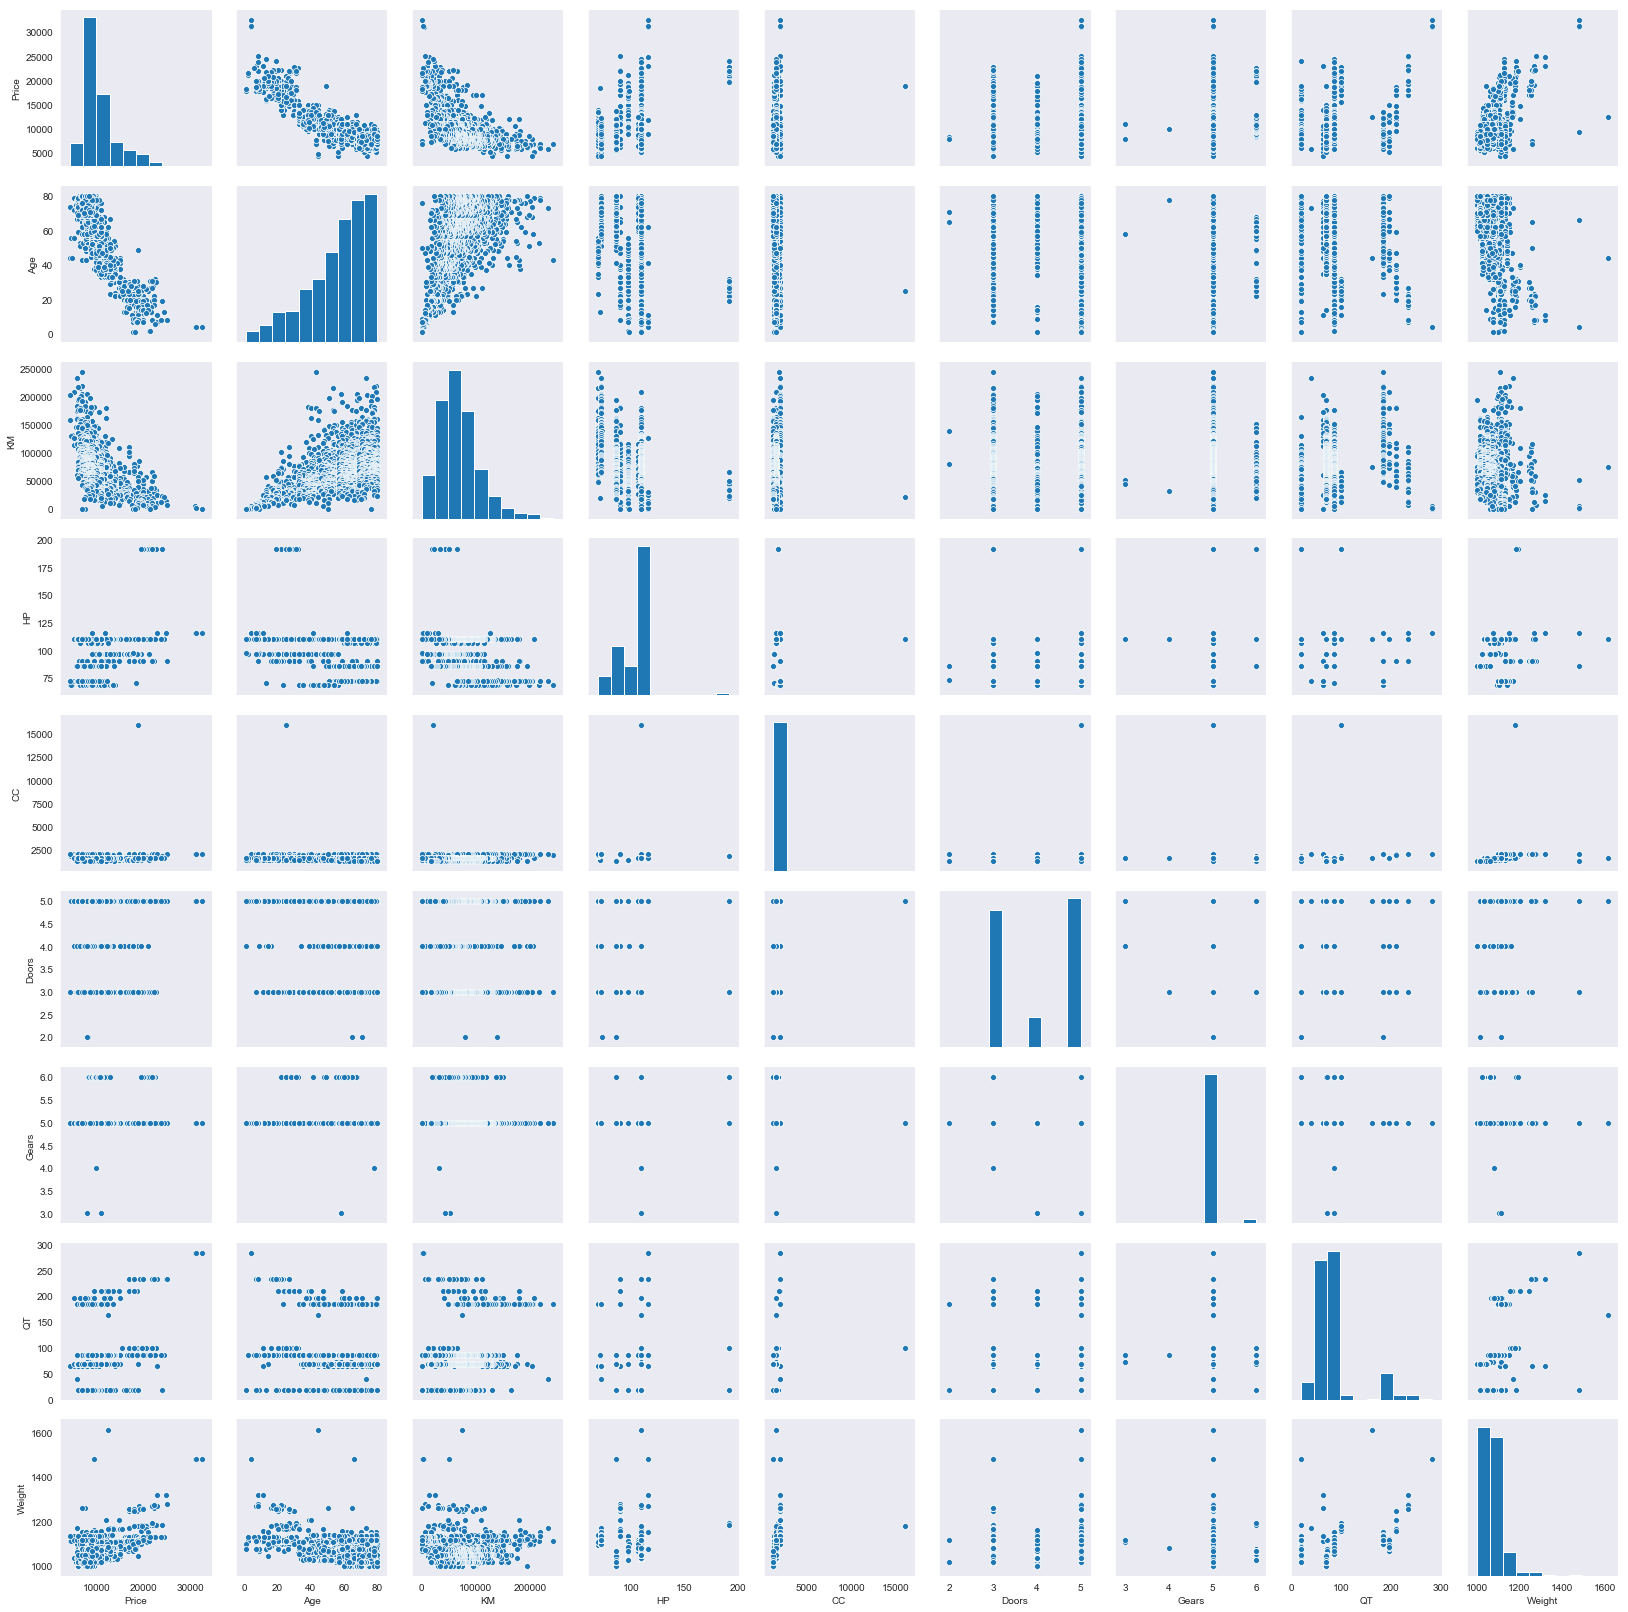

In [51]:
sb.set_style(style='dark')
sb.pairplot(price4)

### Model Building

In [52]:
price5=stm.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=price4).fit()

### Model Testing

In [53]:
# Finding Coefficient parameters, tvalues, pvalues, rsquared values
price5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:24:23   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their tvalues and pvalues
slm_cc=stm.ols('Price~CC',data=price4).fit()
slm_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           2.29e-06
Time:                        19:24:23   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
slm_door=stm.ols('Price~Doors',data=price4).fit()
slm_door.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           2.40e-12
Time:                        19:24:23   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
mlr_DC=stm.ols('Price~Doors+CC',data=price4).fit()
mlr_DC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           2.55e-15
Time:                        19:24:24   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
CC             0.9398      0.220      4.268      0.000       0.508       1.372
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Validation

### Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [57]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_Age=stm.ols("Age~KM+HP+CC+Doors+Gears+QT+Weight",data=price4).fit().rsquared
vif_Age=1/(1-rsq_r)

rsq_KM=stm.ols("KM~Age+HP+CC+Doors+Gears+QT+Weight",data=price4).fit().rsquared
vif_KM=1/(1-rsq_r)

rsq_HP=stm.ols("HP~Age+KM+CC+Doors+Gears+QT+Weight",data=price4).fit().rsquared
vif_HP=1/(1-rsq_r)

rsq_CC=stm.ols("CC~Age+KM+HP+Doors+Gears+QT+Weight",data=price4).fit().rsquared
vif_CC=1/(1-rsq_r)

rsq_Doors=stm.ols("Doors~Age+KM+HP+CC+Gears+QT+Weight",data=price4).fit().rsquared
vif_Doors=1/(1-rsq_r)

rsq_Gears=stm.ols("Gears~Age+KM+HP+CC+Doors+QT+Weight",data=price4).fit().rsquared
vif_Gears=1/(1-rsq_r)

rsq_QT=stm.ols("QT~Age+KM+HP+CC+Doors+Gears+Weight",data=price4).fit().rsquared
vif_QT=1/(1-rsq_r)

rsq_Weight=stm.ols("Weight~Age+KM+HP+CC+Doors+Gears+QT",data=price4).fit().rsquared
vif_Weight=1/(1-rsq_r)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'Vif':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,2.468903
1,KM,2.468903
2,HP,2.468903
3,CC,2.468903
4,Doors,2.468903
5,Gears,2.468903
6,QT,2.468903
7,Weight,2.468903


In [58]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


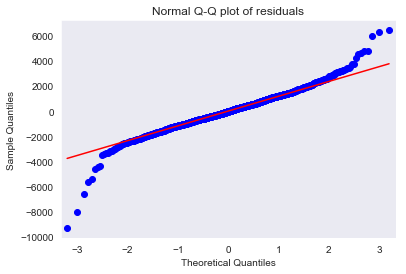

In [59]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(price5.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
mpl.title("Normal Q-Q plot of residuals")
mpl.show()

In [60]:
# outliar detection from above QQ plot of residuals
list(np.where(price5.resid>6000))  

[array([109, 146, 522], dtype=int64)]

In [61]:
list(np.where(price5.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [62]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

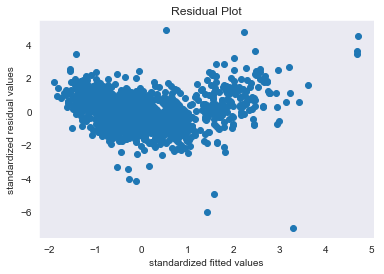

In [63]:
mpl.scatter(standard_values(price5.fittedvalues),standard_values(price5.resid))
mpl.title('Residual Plot')
mpl.xlabel('standardized fitted values')
mpl.ylabel('standardized residual values')
mpl.show() 

In [64]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

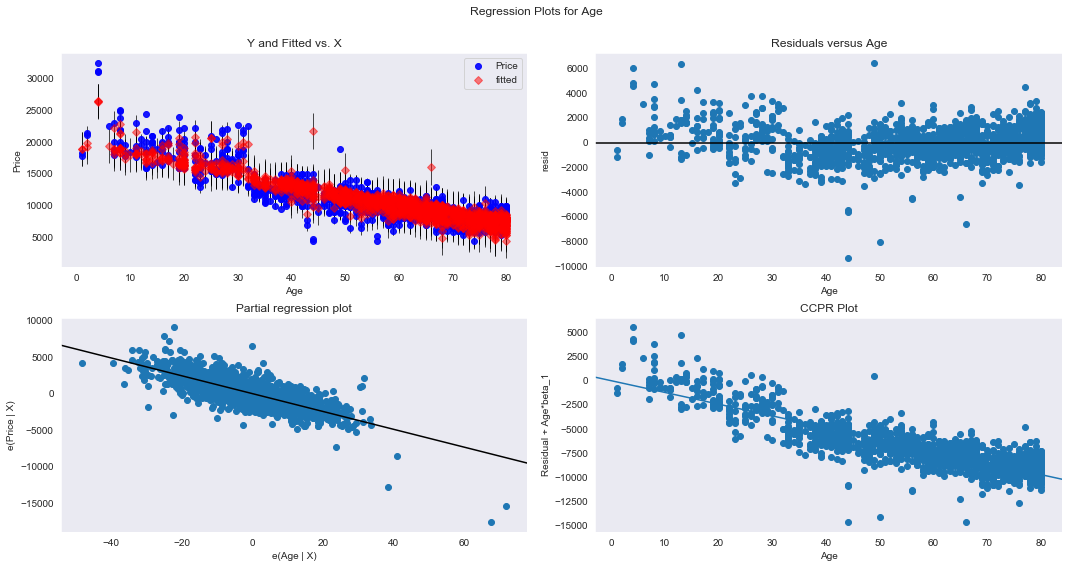

In [65]:
fig=mpl.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(price5,'Age',fig=fig)
mpl.show()

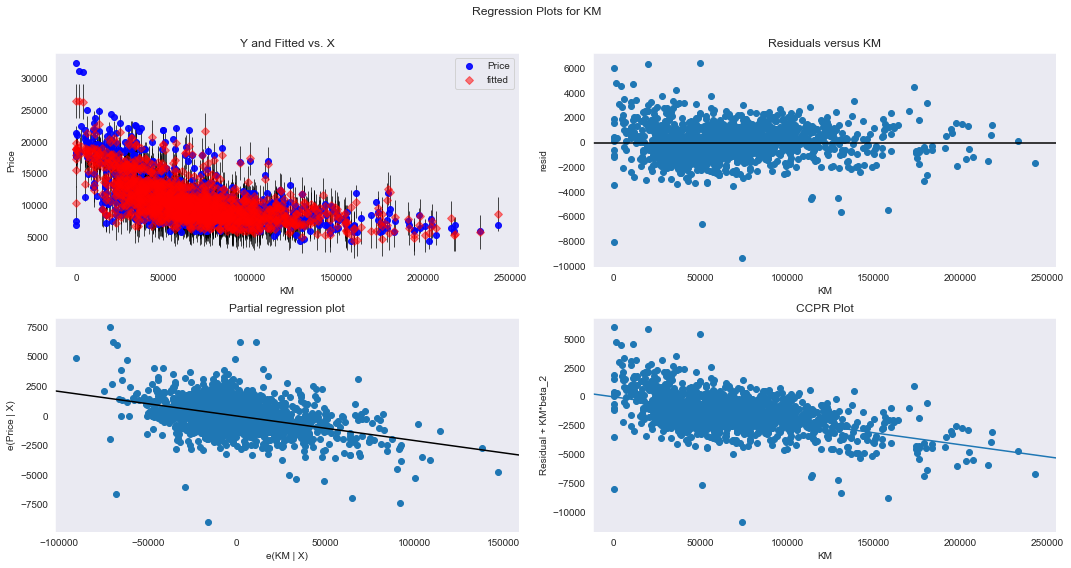

In [66]:
fig=mpl.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(price5,'KM',fig=fig)
mpl.show()

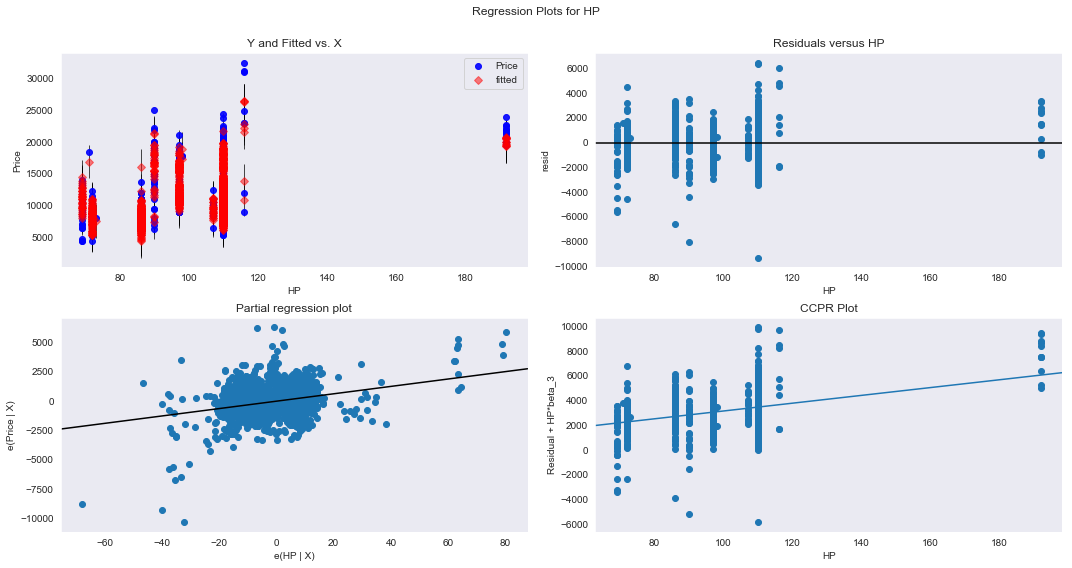

In [67]:
fig=mpl.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(price5,'HP',fig=fig)
mpl.show()

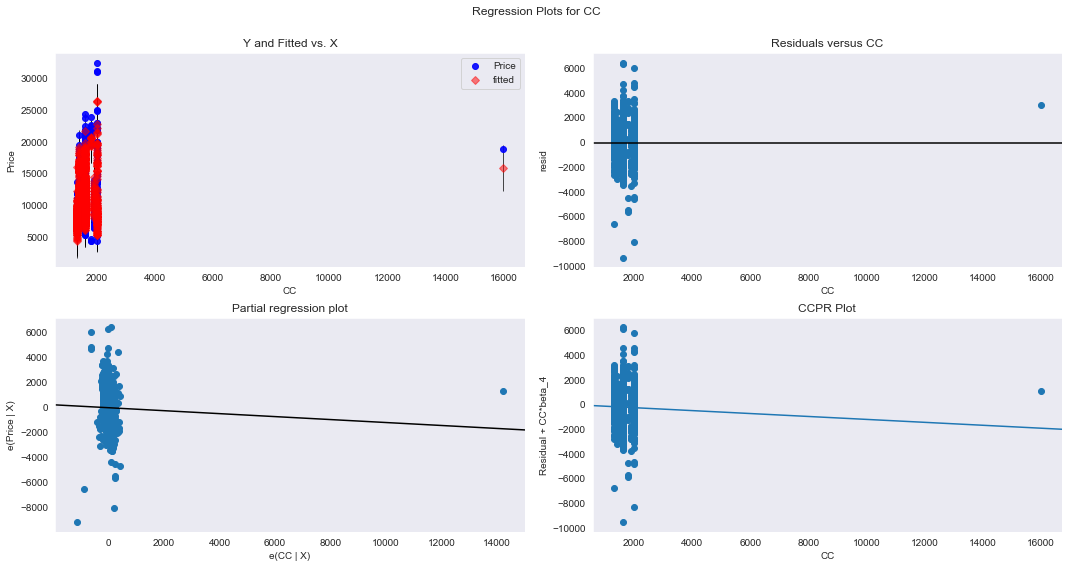

In [68]:
fig=mpl.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(price5,'CC',fig=fig)
mpl.show()

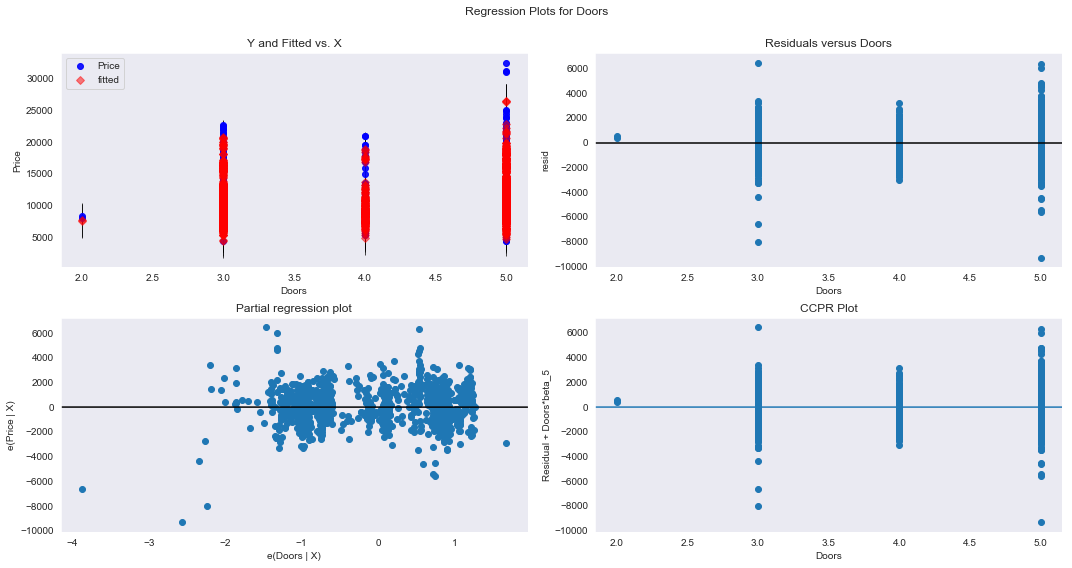

In [69]:
fig=mpl.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(price5,'Doors',fig=fig)
mpl.show()

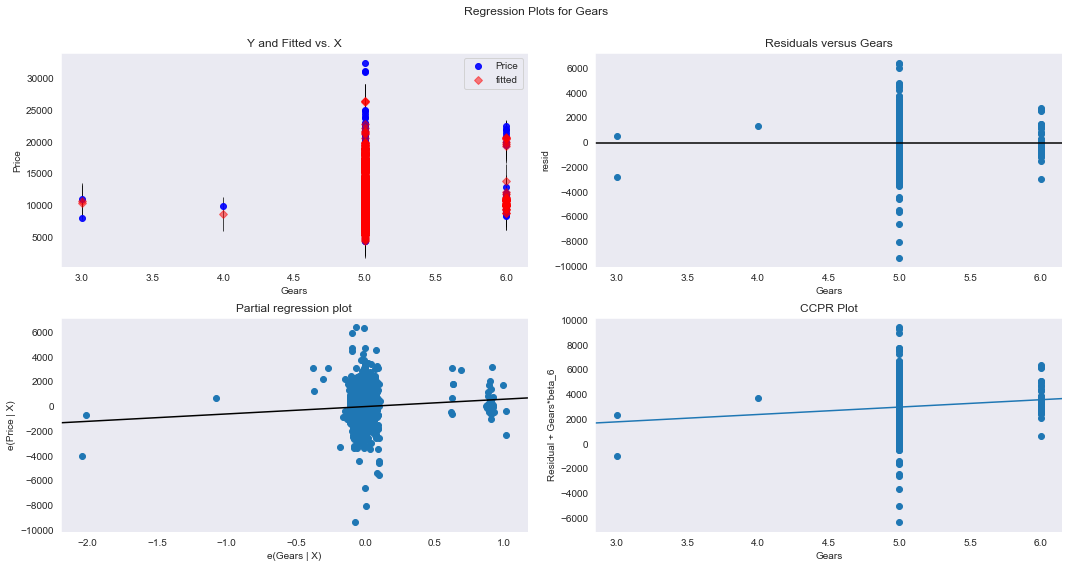

In [70]:
fig=mpl.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(price5,'Gears',fig=fig)
mpl.show()

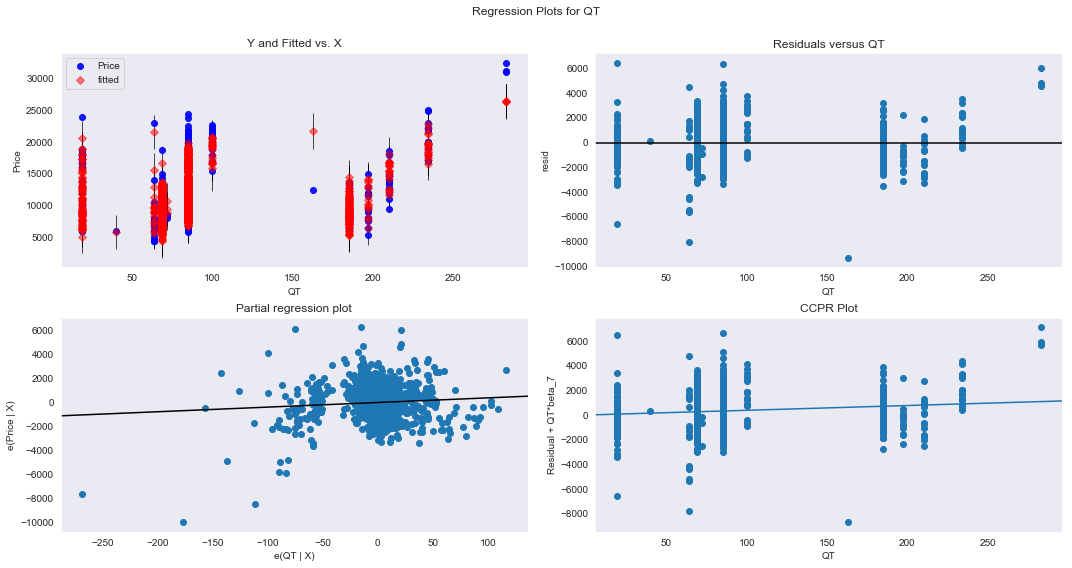

In [71]:
fig=mpl.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(price5,'QT',fig=fig)
mpl.show()

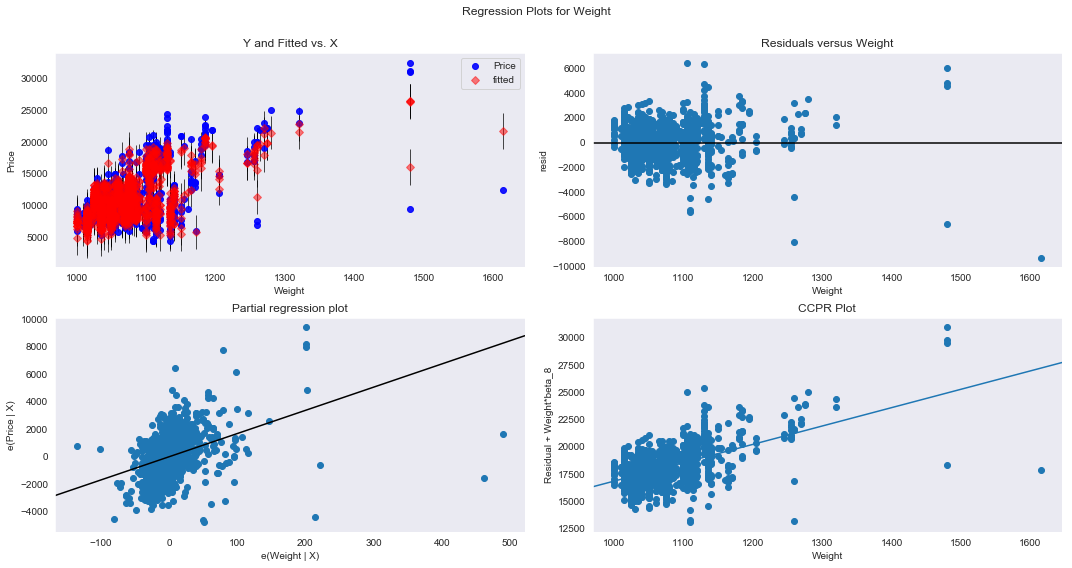

In [72]:
fig=mpl.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(price5,'Weight',fig=fig)
mpl.show()

### Model Deletion Diagnostics (checking Outliers or Influencers)

### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [73]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=price5.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

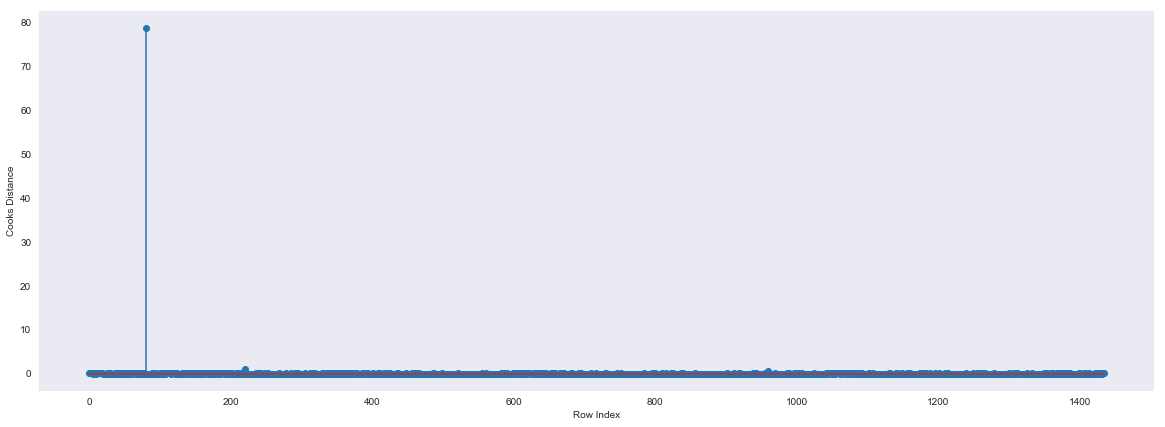

In [74]:
# Plot the influencers using the stem plot
fig=mpl.figure(figsize=(20,7))
mpl.stem(np.arange(len(price4)),np.round(c,3))
mpl.xlabel('Row Index')
mpl.ylabel('Cooks Distance')
mpl.show()

In [75]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582246307)

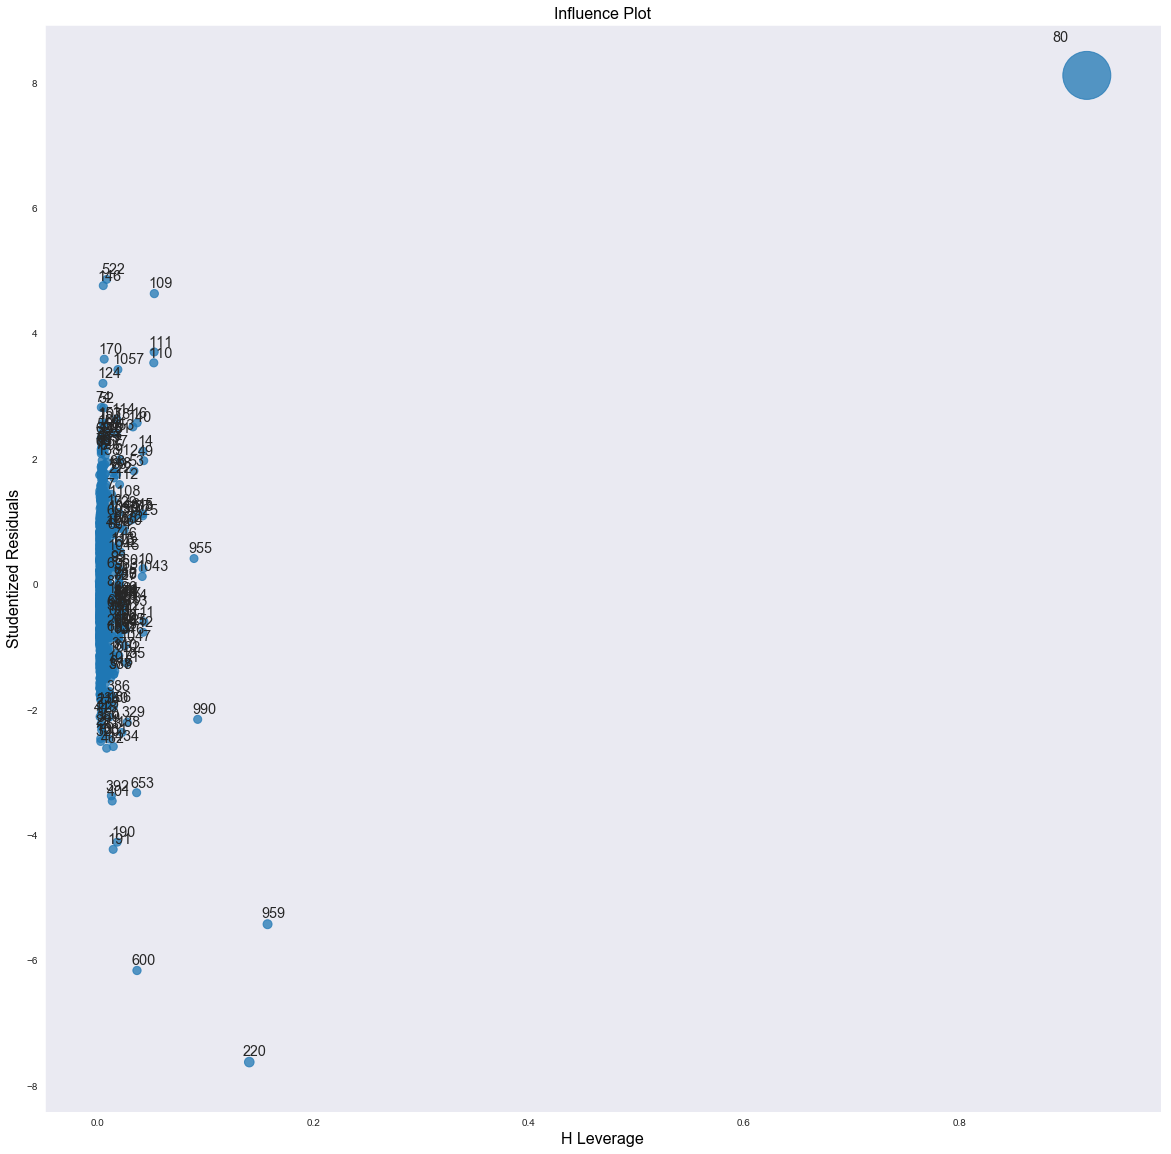

In [76]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=mpl.subplots(figsize=(20,20))
fig=influence_plot(price5,ax = ax)

In [77]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=price4.shape[1]
n=price4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [78]:
price4[price4.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


### Improving the Model

In [79]:
# Creating a copy of data so that original dataset is not affected
price_new=price4.copy()
price_new.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [80]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
price6=price_new.drop(price_new.index[[80]],axis=0).reset_index(drop=True)
price6.tail()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015
1433,6950,76,1,110,1600,5,5,19,1114


### Model Deletion Diagnostics and Final Model

In [81]:
 while np.max(c)>0.5 :
    model=stm.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=price6).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    price6=price6.drop(price6.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    price6
else:
    final_model=stm.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=price6).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [82]:
final_model.rsquared

0.8882395145171204

In [83]:
price6.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Model Predictions

In [84]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [85]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14341.570181
dtype: float64

In [87]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(price6)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
5       15264.967942
6       17632.593606
7       17632.436530
8       20858.294497
9       13547.700232
10      21340.722649
11      21457.083570
12      21327.854320
13      20828.061607
14      20520.936964
15      21234.490235
16      20274.413724
17      16454.705950
18      14860.707076
19      15038.716446
20      14980.367056
21      17653.933665
22      15883.025567
23      16309.536456
24      16312.418359
25      16707.286031
26      16378.809115
27      16036.633085
28      16098.799881
29      16462.296182
            ...     
1401     9143.140408
1402     9828.505396
1403     8046.616940
1404     9025.174625
1405     6813.120197
1406     8918.127762
1407     9289.746780
1408    10021.518994
1409     8086.529973
1410     8972.777790
1411     9820.908182
1412     9158.604679
1413     8069.226166
1414     8695.668806
1415     9345.977711
1416     8537.338862
1417     8416